In [1]:
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict

from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
import operator

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) **2))

def normalized(matrix):
    return (matrix - np.mean(matrix)) / np.std(matrix)

def predict(X_train, y_train, X_test, K):

    # list to store all our predictions
    predictions = []
    
    # loop over all elements in the test set
    for i in range(len(X_test)):
        # get the neighbors
        neighbor_count = defaultdict(int)            
        
        # calculate the distance between the test point and all other points in the training set
        distance = np.array([euclidean_distance(X_test[i], v) for v in X_train])
        
        # sort the distances and return the indices of K neighbors
        # store the first K distances in a list.
        # argsort will return the indices of the K nearest points
        distance_sorted = distance.argsort()[:K]

        # for each neighbor find the class
        for distance_index in distance_sorted:
            #  loop over all the points in the list distance_sorted and add it to the dictionary
            neighbor_count[y_train[distance_index]] += 1

        # sort the dictionary in the descending order based on the values
        # the values in the dictionary -> number of votes for that specific label
        neighbor_count_sorted = sorted(neighbor_count.items(), key=operator.itemgetter(1), reverse=True)
        
        # append the label to the list {label: votes}
        predictions.append(neighbor_count_sorted[0][0])
    return predictions

In [3]:
mnist = datasets.load_digits()
mnist_normalized = normalized(mnist.data)
X_train, X_test, y_train, y_test = train_test_split(mnist_normalized, mnist.target,test_size=.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 64)
(360, 64)
(1437,)
(360,)


In [4]:
k_accuracy_map = {}

for k in range(2, 8):
    predictions = predict(X_train, y_train, X_test, k)
    k_accuracy_map[k] = accuracy_score(y_test, predictions)

Text(0, 0.5, 'accuracy')

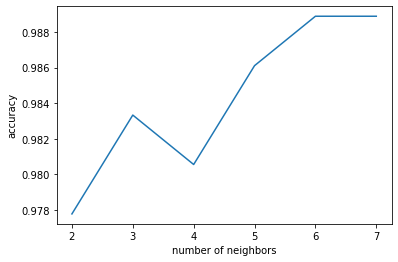

In [5]:
plt.plot(list(k_accuracy_map.keys()), list(k_accuracy_map.values()))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')

In [6]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       1.00      0.97      0.99        34
           8       1.00      1.00      1.00        30
           9       0.97      0.95      0.96        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



# 20 NG

In [24]:
newsgroups = datasets.fetch_20newsgroups(categories=['sci.space', 'sci.med', 'sci.electronics'])
newsgroups.target_names

['sci.electronics', 'sci.med', 'sci.space']

In [25]:
vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform(newsgroups.data)
vector = normalized(vector.toarray())

X_train, X_test, y_train, y_test = train_test_split(vector, newsgroups.target,test_size=.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1422, 31201)
(356, 31201)
(1422,)
(356,)


In [29]:
k_accuracy_map = {}

for k in range(2, 6):
    predictions = predict(X_train, y_train, X_test, k)
    k_accuracy_map[k] = accuracy_score(y_test, predictions)

Text(0, 0.5, 'accuracy')

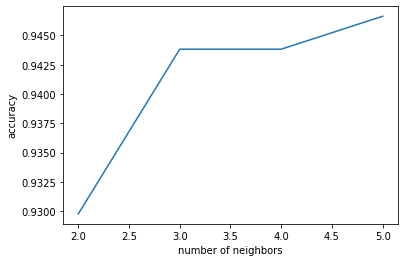

In [30]:
plt.plot(list(k_accuracy_map.keys()), list(k_accuracy_map.values()))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       119
           1       0.97      0.94      0.95       120
           2       0.91      0.98      0.95       117

    accuracy                           0.95       356
   macro avg       0.95      0.95      0.95       356
weighted avg       0.95      0.95      0.95       356

